In [1]:
import numpy as np
import pandas as pd
import os, re
import matplotlib.pyplot as plt
%matplotlib inline

### Custom Z, R Parameters for Precipitation Rate

From looking around, the Z and R parameters for radar to precipitation rate conversion vary widely depending on the specific circumstances. Additionally, just getting a small area dBZ read still doesn't allow for straight conversion, because the mean precipitation is being calculated later than it would in Spark, so the values are different.

However, it's a good place to look at how the parameters will change the dBZ values, and since we're trying to keep the values for O'Hare as close to Marshall-Palmer as possible, while increasing how high they get for higher values, it's quicker to look at the relative change on the raw values here.

In [2]:
ord_mdw = pd.read_csv('nexrad_data/ord-mdw-dbz.csv')
ord_mdw = ord_mdw[['timestamp', 'ORD', 'MDW']]
print(ord_mdw.shape)
print(ord_mdw.dtypes)
ord_mdw.head()

(2364, 3)
timestamp     object
ORD          float64
MDW          float64
dtype: object


,timestamp,ORD,MDW
0,2016-05-28 21:18:22,0.00,20.5
1,2016-05-28 22:07:27,24.50,0.0
2,2016-05-28 22:11:40,22.00,0.0
3,2016-05-28 22:29:45,21.80,0.0
4,2016-05-28 22:38:26,21.25,0.0


In [3]:
ord_mdw['timestamp'] = pd.to_datetime(ord_mdw['timestamp'])
ord_mdw.head()

,timestamp,ORD,MDW
0,2016-05-28 21:18:22,0.00,20.5
1,2016-05-28 22:07:27,24.50,0.0
2,2016-05-28 22:11:40,22.00,0.0
3,2016-05-28 22:29:45,21.80,0.0
4,2016-05-28 22:38:26,21.25,0.0


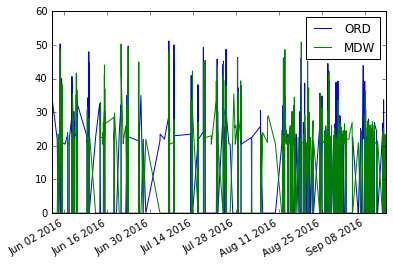

In [4]:
ord_mdw = ord_mdw.set_index(pd.DatetimeIndex(ord_mdw['timestamp']))
ord_mdw = ord_mdw[['ORD', 'MDW']]
ord_mdw.plot()

In [80]:
# Marshall-Palmer
def precip_rate1(dbz):
    return pow(pow(10, dbz/10)/200, 0.625)

# Misc. version found online
def precip_rate2(dbz):
    return pow(pow(10, dbz/10)/250, (10/12))

# Version referenced for storms
def precip_rate3(dbz):
    return pow(pow(10, dbz/10)/300, (10/14))
# 325 825
def precip_rate_test(dbz):
    return pow(pow(10, dbz/10)/300, 0.85)

In [81]:
# Copy the main DataFrame, just look at a single day
converted_df = ord_mdw.copy()
day_df = converted_df['2016-08-12']

122.42029703858856 vs 142.1469748469673, % diff: 0.161138947426019
372.8210436997103 vs 603.7958280409065, % diff: 0.6195325833786235


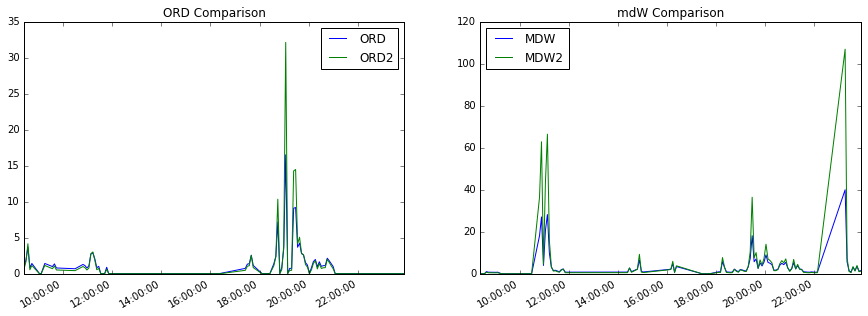

In [82]:
fig, axs = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = [15, 5]

pr_df = precip_rate1(day_df)
pr_df[['ORD2','MDW2']] = precip_rate_test(day_df)

print('{} vs {}, % diff: {}'.format(pr_df['ORD'].sum(), pr_df['ORD2'].sum(), (abs(pr_df['ORD2'].sum() - pr_df['ORD'].sum())/pr_df['ORD'].sum())))
print('{} vs {}, % diff: {}'.format(pr_df['MDW'].sum(), pr_df['MDW2'].sum(), (abs(pr_df['MDW2'].sum() - pr_df['MDW'].sum())/pr_df['MDW'].sum())))
pr_df[['ORD','ORD2']].plot(title='ORD Comparison', ax=axs[0])
pr_df[['MDW','MDW2']].plot(title='mdW Comparison', ax=axs[1])

In [54]:
# fig, axs = plt.subplots(1,2)
# plt.rcParams["figure.figsize"] = [15, 5]

# # Converting to precipitation, will be substantially lower because not pulling from wider area

# pr_df = precip_rate1(day_df)
# pr_df[['ORD2','MDW2']] = pr_df[['ORD','MDW']].applymap(lambda x: precip_rate_test_tier(x))
# #pr_df = pr_df * 0.0833 / 25.4

# print('{} vs {}, % diff: {}'.format(pr_df['ORD'].sum(), pr_df['ORD2'].sum(), (abs(pr_df['ORD2'].sum() - pr_df['ORD'].sum())/pr_df['ORD'].sum())))
# print('{} vs {}, % diff: {}'.format(pr_df['MDW'].sum(), pr_df['MDW2'].sum(), (abs(pr_df['MDW2'].sum() - pr_df['MDW'].sum())/pr_df['MDW'].sum())))
# pr_df[['ORD','ORD2']].plot(title='ORD Comparison', ax=axs[0])
# pr_df[['MDW','MDW2']].plot(title='mdW Comparison', ax=axs[1])

0.4014807379257648 vs 0.46617492144694367, % diff: 0.16113894742601842
1.222676887408892 vs 1.9801650581026584, % diff: 0.6195325833786244


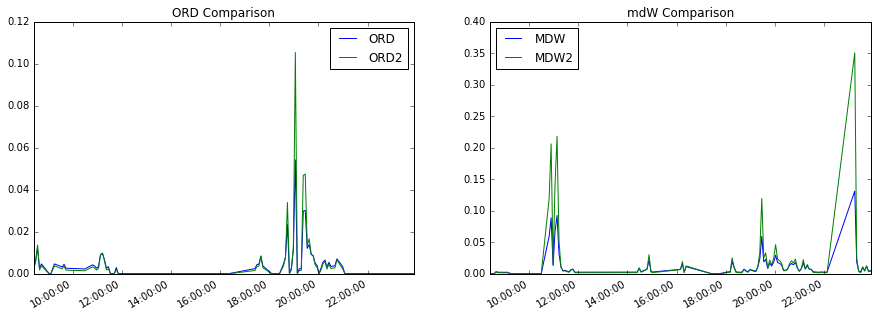

In [23]:
fig, axs = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = [15, 5]

# Converting to precipitation, will be substantially lower because not pulling from wider area

pr_df = precip_rate1(day_df)
pr_df[['ORD2','MDW2']] = precip_rate_test(day_df)
pr_df = pr_df * 0.0833 / 25.4

print('{} vs {}, % diff: {}'.format(pr_df['ORD'].sum(), pr_df['ORD2'].sum(), (abs(pr_df['ORD2'].sum() - pr_df['ORD'].sum())/pr_df['ORD'].sum())))
print('{} vs {}, % diff: {}'.format(pr_df['MDW'].sum(), pr_df['MDW2'].sum(), (abs(pr_df['MDW2'].sum() - pr_df['MDW'].sum())/pr_df['MDW'].sum())))
pr_df[['ORD','ORD2']].plot(title='ORD Comparison', ax=axs[0])
pr_df[['MDW','MDW2']].plot(title='mdW Comparison', ax=axs[1])